## Diabetes detection using Logistic Regression

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## loading the dataset
data = pd.read_csv('diabetes.csv')

In [3]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
## checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Details about all Features

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: indicates the function which scores likelihood of diabetes based on family history.
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [6]:
## Checking the dataset is imbalanced or not
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
print('Not having diabetes: ',(500/768)*100,' %')
print('Having diabetes: ',(268/768)*100,' %')

Not having diabetes:  65.10416666666666  %
Having diabetes:  34.89583333333333  %


Ratio between having and not-having diabetes is not that much high, so we can say it is not an imbalanced dataset.

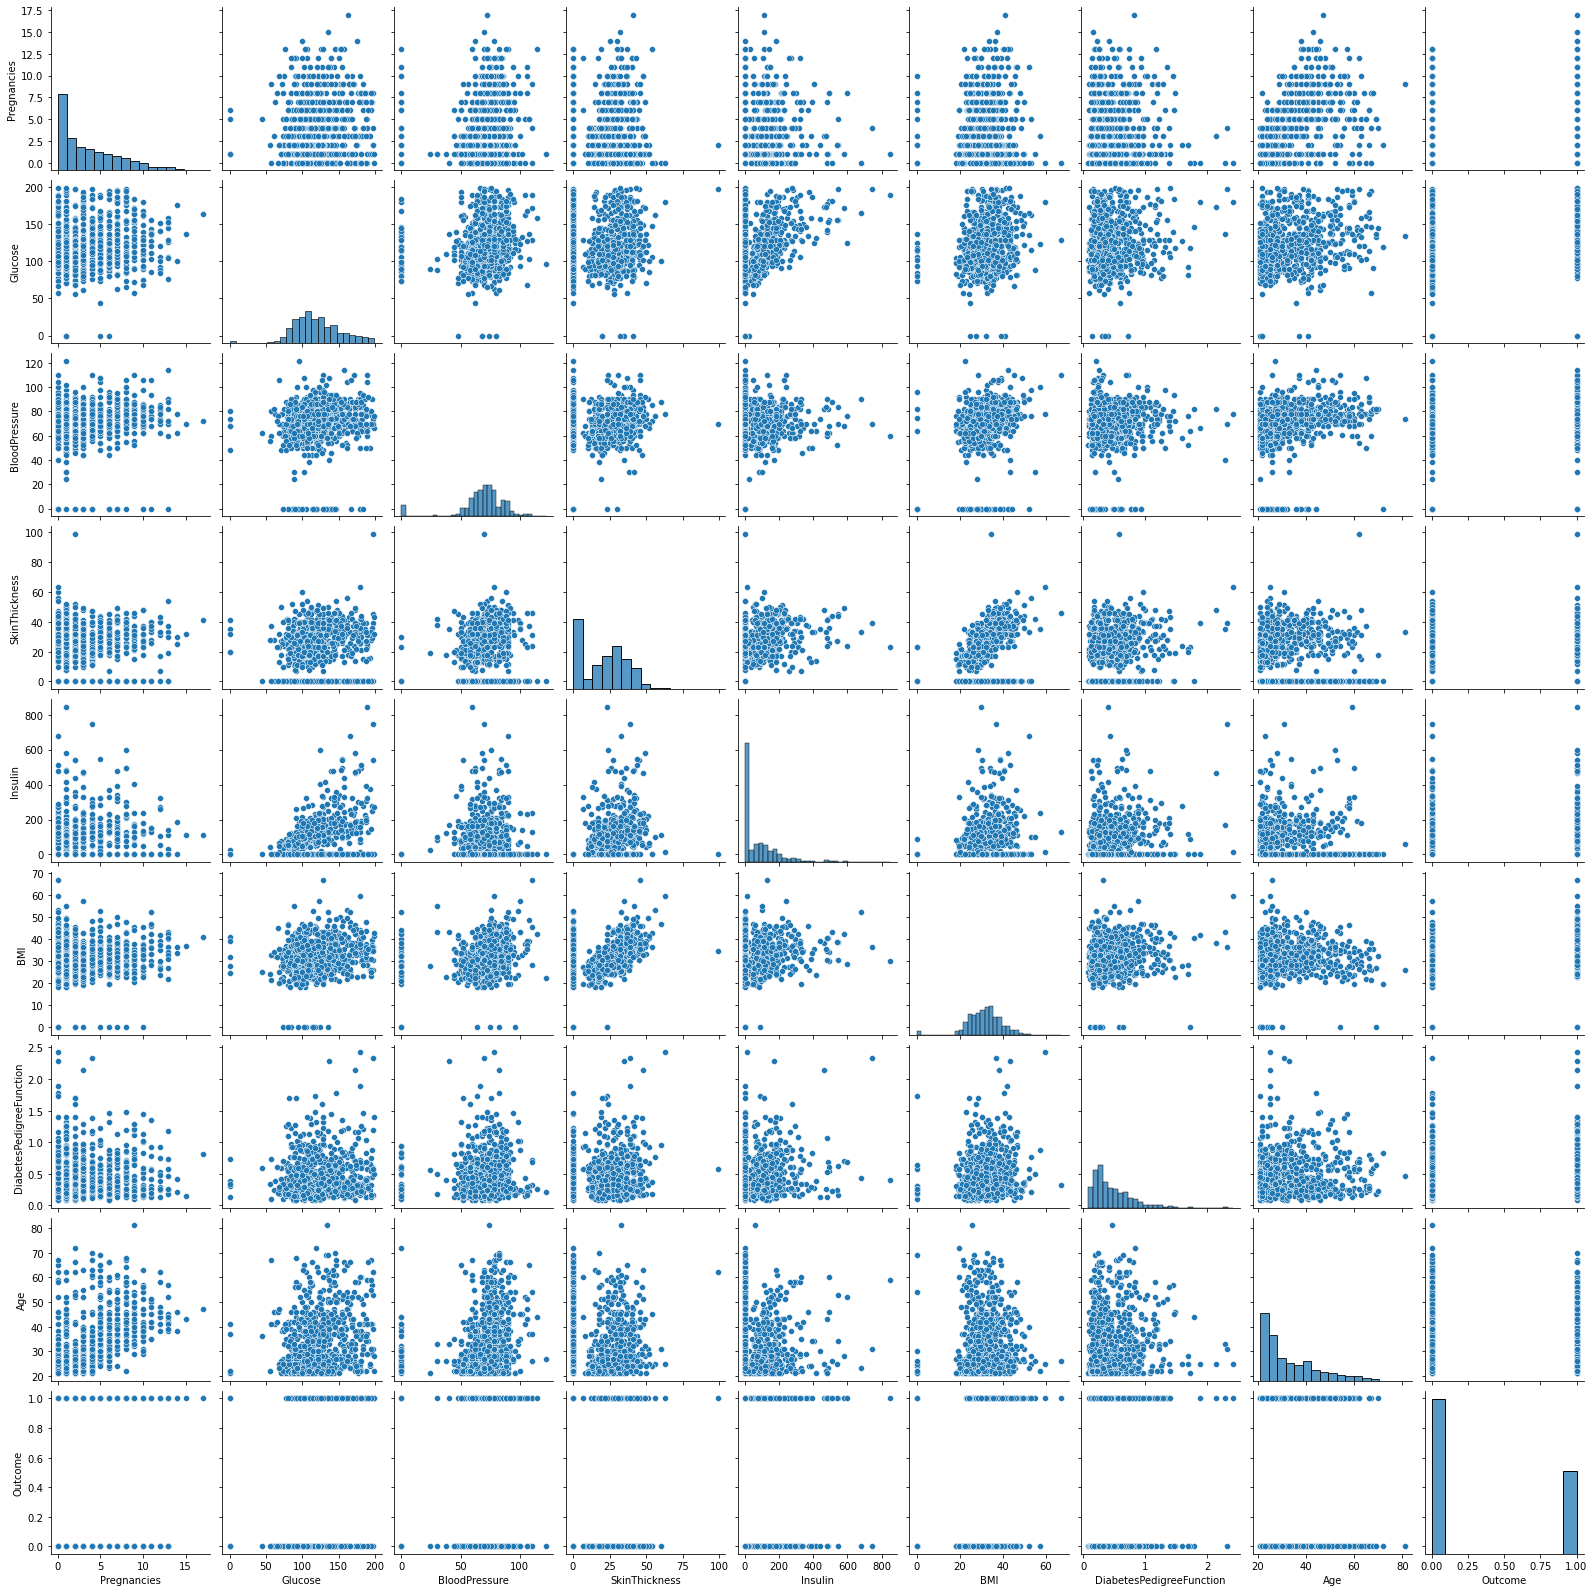

In [8]:
sns.pairplot(data)

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

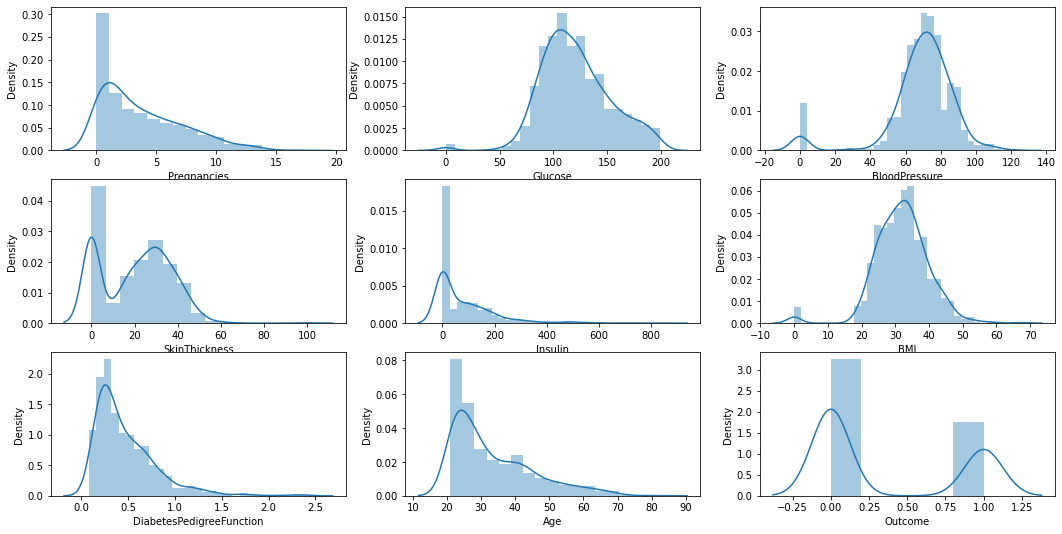

In [10]:
## checking distribution for all independent features with respect to Outcome
plt.figure(figsize=(18,9))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(data[column])

From the above distribution of all the features, we can see some skewness for some the featues, means having some kind of outliers.

In [11]:
## Checking for zero value 
print('Glucose feature is having {0} datapoints as value zero.'.format(len(data[data['Glucose']==0])))
print('BloodPressure feature is having {0} datapoints as value zero.'.format(len(data[data['BloodPressure']==0])))
print('SkinThickness feature is having {0} datapoints as value zero.'.format(len(data[data['SkinThickness']==0])))
print('Insulin feature is having {0} datapoints as value zero.'.format(len(data[data['Insulin']==0])))
print('BMI feature is having {0} datapoints as value zero.'.format(len(data[data['BMI']==0])))

Glucose feature is having 5 datapoints as value zero.
BloodPressure feature is having 35 datapoints as value zero.
SkinThickness feature is having 227 datapoints as value zero.
Insulin feature is having 374 datapoints as value zero.
BMI feature is having 11 datapoints as value zero.


Replacing the zero with the mean for the above features, because we cannot have value as zero for those features

In [12]:
data['Glucose'].replace([0],[np.mean(data['Glucose'])],inplace=True)

In [13]:
data['BloodPressure'].replace([0],[np.mean(data['BloodPressure'])],inplace=True)

In [14]:
data['SkinThickness'].replace([0],[np.mean(data['SkinThickness'])],inplace=True)

In [15]:
data['Insulin'].replace([0],[np.mean(data['Insulin'])],inplace=True)

In [16]:
data['BMI'].replace([0],[np.mean(data['BMI'])],inplace=True)

C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

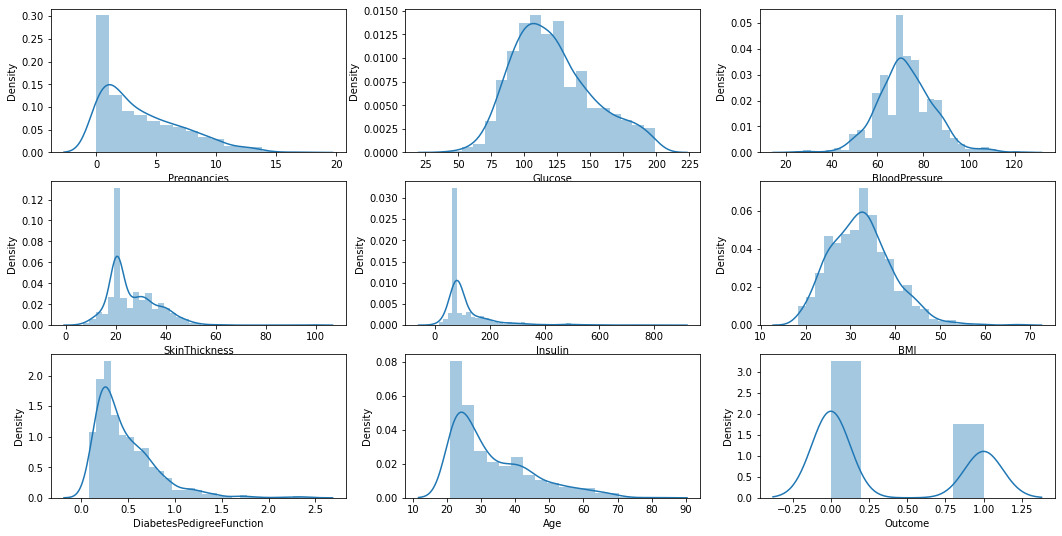

In [17]:
## Now let's check the distribuion again
plt.figure(figsize=(18,9))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(data[column])

C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anaconda3\lib\si

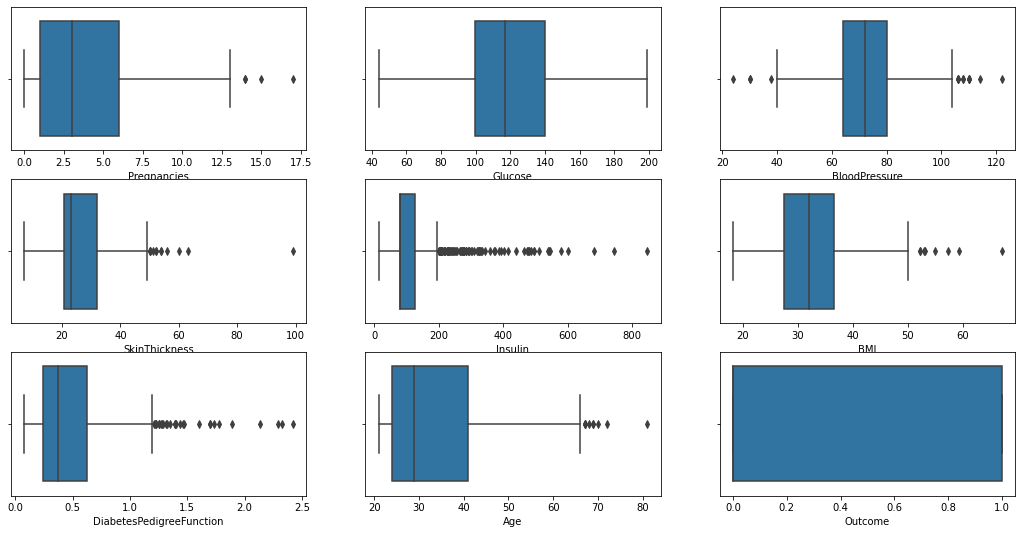

In [18]:
## Now let's check create the boxplot to check outliers
plt.figure(figsize=(18,9))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data[column])

In [22]:
## Copy the dataset to another dataframe
data_cleaned = data.copy()
print(data_cleaned.shape)
print(data.shape)

(768, 9)
(768, 9)


In [23]:
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [24]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

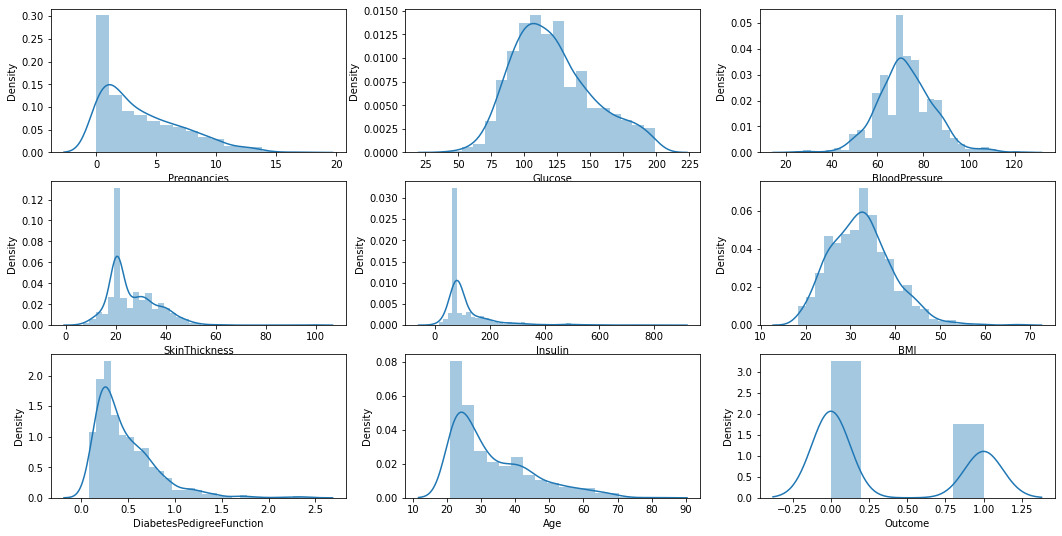

In [25]:
## Now let's check the distribuion again
plt.figure(figsize=(18,9))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(data[column])

In [26]:
## independent features
X = data.iloc[:,:-1]

In [27]:
## dependent feature
y = data.iloc[:,-1]

C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chatt\anacond

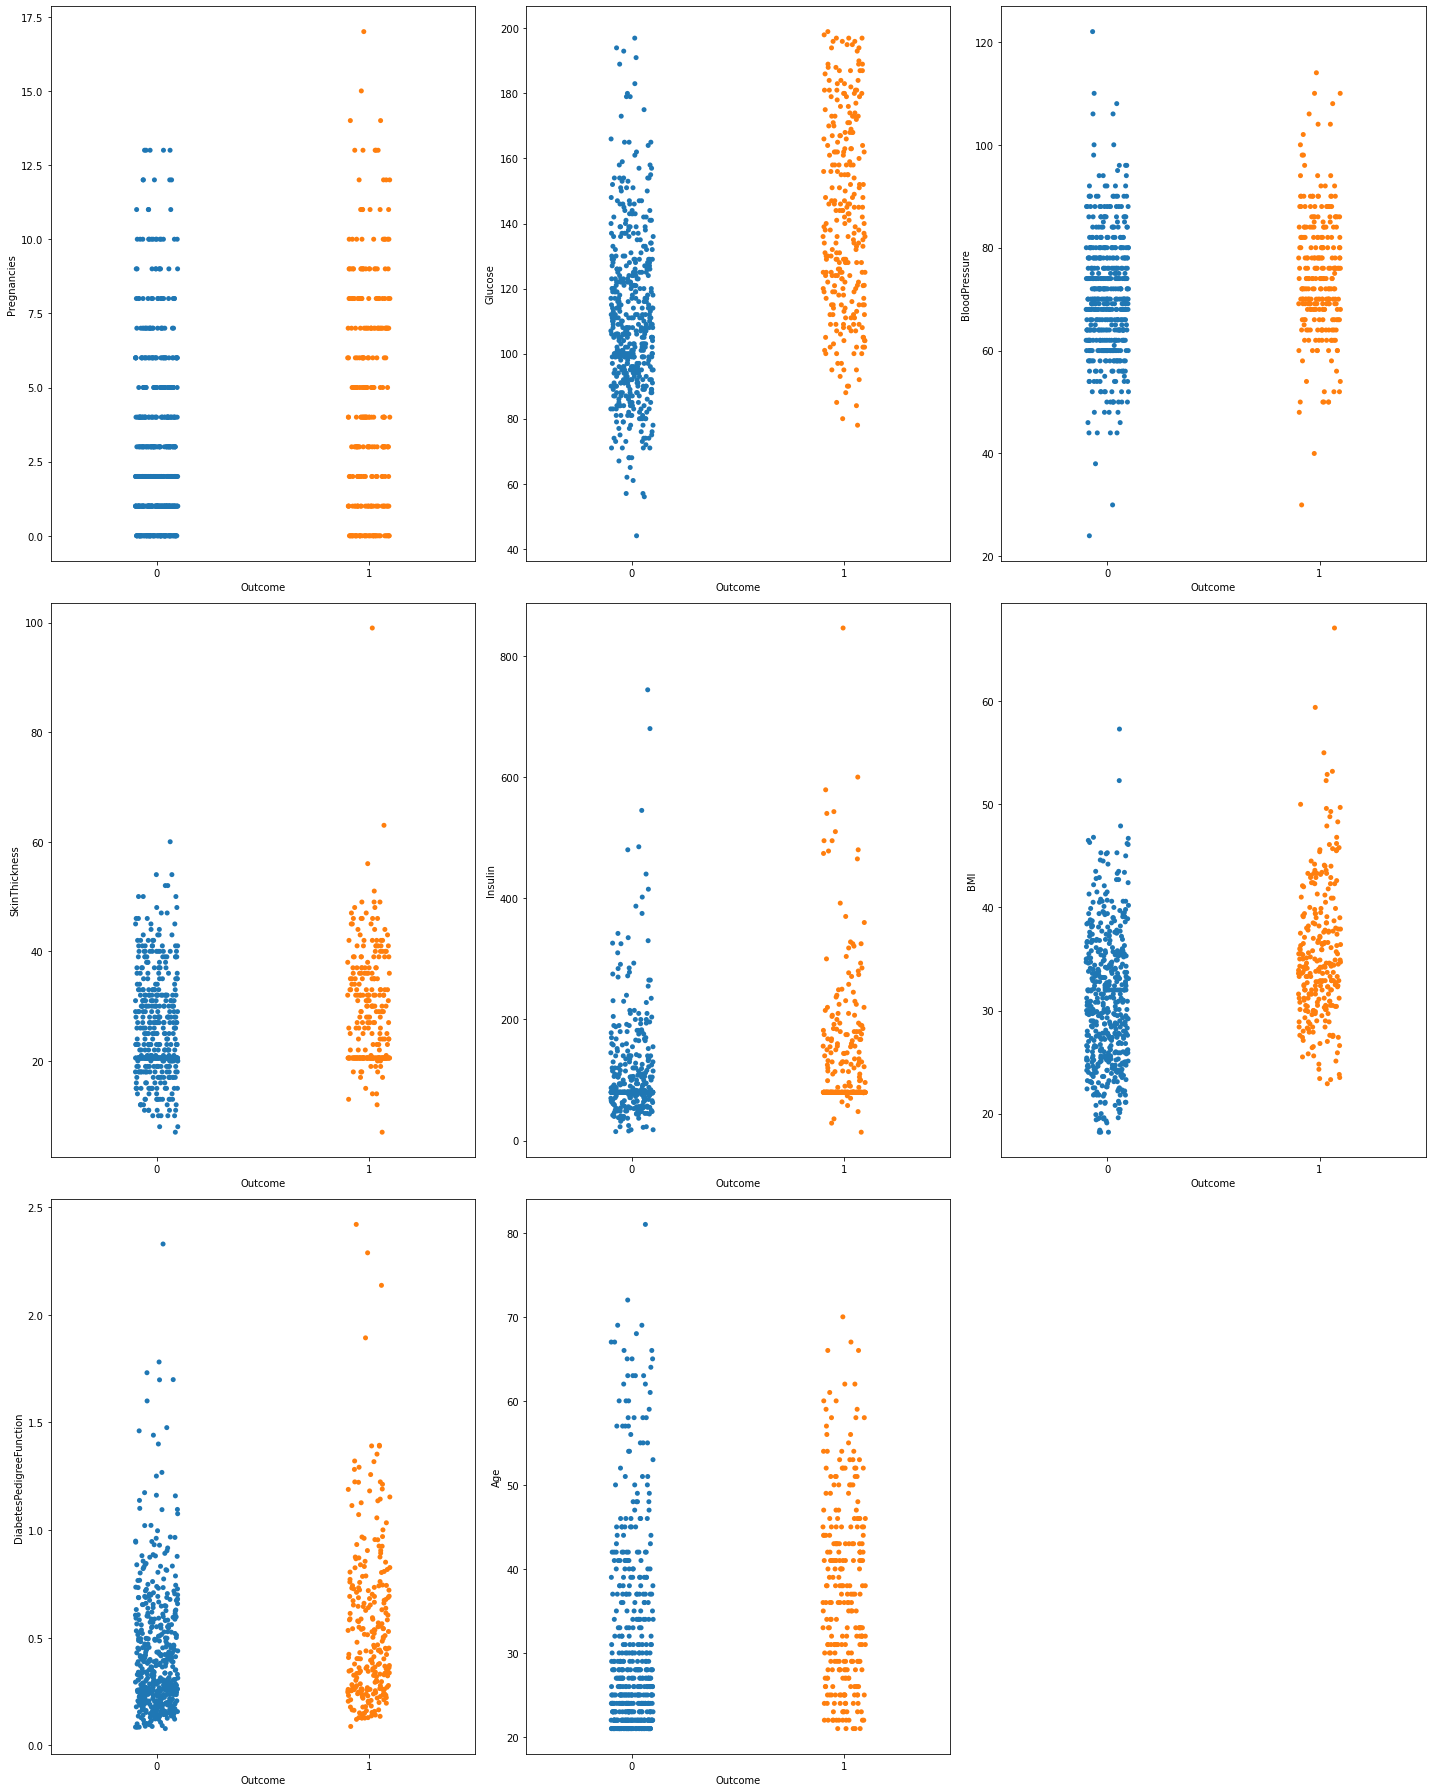

In [28]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [29]:
## Let's split the dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [31]:
## Let's scale our independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
scaler.fit_transform(X_train)

array([[ 1.21723833, -1.26958833,  0.12497202, ...,  0.85079953,
        -0.06245673,  0.49282404],
       [ 1.80617514, -1.80030425,  2.78538855, ...,  0.44856413,
        -0.58537677,  1.17745871],
       [-0.25510371, -0.0754775 , -0.20758005, ...,  1.51161481,
        -0.07765789, -0.27738996],
       ...,
       [-0.84404052, -1.13690935,  0.45752409, ..., -0.05423011,
        -0.34215814, -0.36296929],
       [ 0.0393647 , -1.07056986, -0.2819496 , ..., -0.62885209,
         0.40269889, -0.19181062],
       [-1.13850893,  0.52157791, -1.03896022, ...,  0.31927419,
         0.1716412 , -1.04760396]])

In [33]:
scaler.transform(X_test)

array([[ 0.33383311,  1.18497281,  0.95635219, ...,  1.00882057,
        -0.25095116, -0.36296929],
       [-0.84404052, -0.70570266, -1.87034038, ..., -1.17474298,
         0.14731934, -0.61970729],
       [-1.13850893, -0.4403447 ,  1.28890425, ...,  0.01759764,
         1.14755593,  0.40724471],
       ...,
       [-0.84404052, -0.4403447 , -1.20523625, ..., -0.55702435,
        -0.78603213, -0.96202463],
       [-0.54957211, -1.17007909, -1.20523625, ...,  0.04632874,
        -0.94716447, -0.70528663],
       [ 0.0393647 , -0.14181699, -0.20758005, ...,  1.74146361,
         1.29652734, -0.61970729]])

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [35]:
regressor.fit(X_train,y_train)

C:\Users\chatt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(regressor,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(regressor,f)

In [38]:
regressor.coef_

array([[ 0.04307633,  0.04136877, -0.03355644, -0.01049165, -0.00318269,
         0.06852338,  2.73041267,  0.01963494]])

In [39]:
regressor.intercept_

array([-6.98411017])

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

## Accuracy, Confusion_Matrix

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
accuracy = accuracy_score(y_test,y_pred)

In [45]:
accuracy

0.7239583333333334

In [46]:
conf_mat = confusion_matrix(y_test,y_pred)

In [47]:
conf_mat

array([[105,  25],
       [ 28,  34]], dtype=int64)

In [48]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [51]:
## formula for accuracy
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)

In [52]:
Accuracy

0.7239583333333334

In [53]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8076923076923077

In [54]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7894736842105263

In [55]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7984790874524715